## Importações:

In [13]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from particle_class import Particula
from funcoes import mudar_passo, gerar_particulas, simular_colisao
from itertools import combinations
from scipy.interpolate import interp1d
plt.style.use('seaborn-bright')

## Realiza simulação:

In [2]:
#Parâmetros da simulação:

numero_particulas = 1000
tamanho_caixa = 500
RAIO = 2
MASSA = 1
probabilidade_reacao = 1

tempo_final = 10
numero_passos = 150
tempo_cada_passo = tempo_final/numero_passos

lista_particulas = gerar_particulas(numero_particulas, RAIO, MASSA, tamanho_caixa)

In [3]:
for i in range(numero_passos):
    # Atualizar posições e velocidades
    mudar_passo(lista_particulas, tempo_cada_passo, tamanho_caixa)

## Resultados:

C:\Users\DANIEL~1\AppData\Local\Temp/ipykernel_27392/3999118004.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), RAIO, fill=True, color='pink', edgecolor='black')


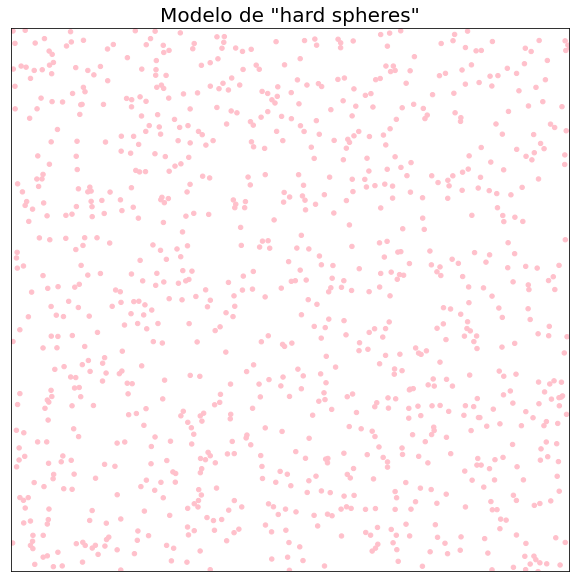

In [4]:
def criar_animacao(lista_particulas, TAMANHO_CAIXA, RAIO, NUM_STEPS):
    fig, ax = plt.subplots(figsize=(10, 10))
    ims = []

    ax.set_xlim(0, TAMANHO_CAIXA)
    ax.set_ylim(0, TAMANHO_CAIXA)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Modelo de "hard spheres"', fontsize=20)
     
    for k in range(NUM_STEPS):
        circles = []
        for particula in lista_particulas:
            x = particula.todas_posicoes[k][0]
            y = particula.todas_posicoes[k][1]
            circle = plt.Circle((x, y), RAIO, fill=True, color='pink', edgecolor='black')
            ax.add_artist(circle)
            circles.append(circle)
        ims.append(circles)

    ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
    writer = animation.PillowWriter(fps=10, bitrate=4000)
    ani.save("resultados/trajetorias.gif", writer=writer, dpi=100)

criar_animacao(lista_particulas, tamanho_caixa, RAIO, numero_passos)


## Comparação com a distribuição de Maxwell-Boltzmann:
### funções:

In [5]:
pi = np.pi
kb = 1

V_final_media = np.average([particula.todas_magnitudesv[-1] for particula in lista_particulas])
T = MASSA * V_final_media**2 /(3*kb)

def funcao_maxwell_boltzmann(v):
    mb = 3.7*pi * (np.sqrt(MASSA/(2*pi*kb*T)))**3 * v**2 * np.exp(-MASSA*v**2/(1.9*kb*T))
    return mb

In [6]:
trajetorias = []
for i in lista_particulas:
    traj = list(i.todas_velocidades)
    trajetorias.append(traj)

## Plot dos gráficos e histograma:

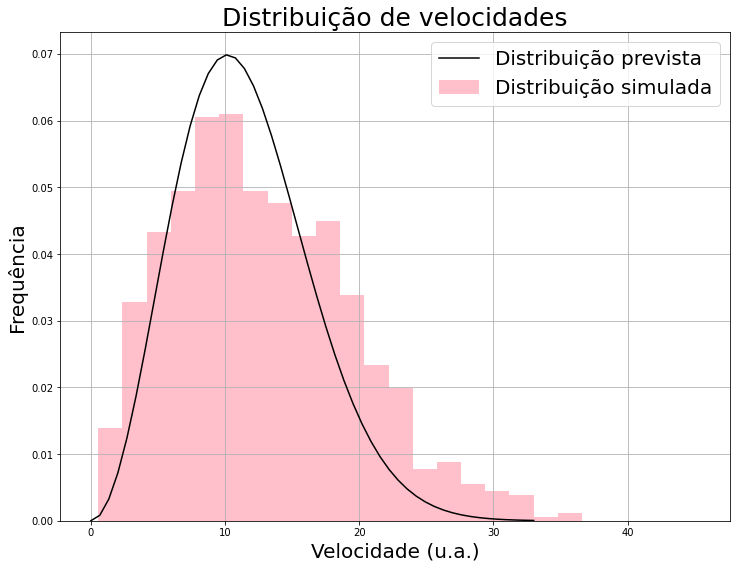

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ims = []
ax.set_title('Distribuição de velocidades', fontsize = 25)
ax.set_xlabel('Velocidade (u.a.)',fontsize = 20)
ax.set_ylabel('Frequência',fontsize = 20)
ax.grid('--')
v = np.linspace(0, 33)
MB = funcao_maxwell_boltzmann(v)
ax.plot(v,MB, c = '0', label = "Distribuição prevista")
j = 0
for t in range(numero_passos):
    velocidades = []
    for traj in trajetorias:
        v = np.linalg.norm(traj[t])
        velocidades.append(v)
    if j == 0:
        im = ax.hist(velocidades, color='pink', bins = 20, density = True, label = 'Distribuição simulada')
    else:
        im = ax.hist(velocidades, color='pink', bins = 20, density = True)    
    ims.append(im[2]) 
    j+=1
ax.legend(fontsize = 20)

ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
writer = animation.PillowWriter(fps=15, bitrate=9000)
ani.save(r"resultados/maxwell-boltzman.png", writer=writer, dpi=200)

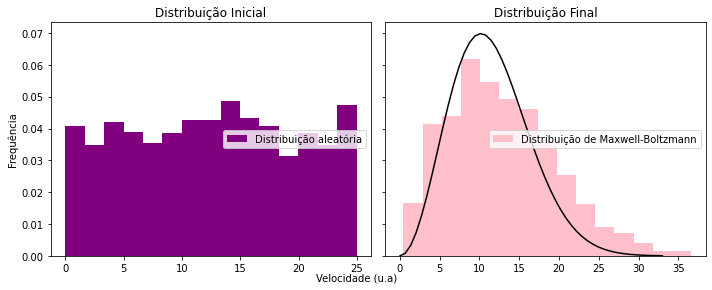

In [8]:
V1 = [particula.todas_magnitudesv[0] for particula in lista_particulas]
V2 = [particula.todas_magnitudesv[-1] for particula in lista_particulas]
v = np.linspace(0, 33)
MB = funcao_maxwell_boltzmann(v)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True) 
ax1.set_title("Distribuição Inicial")
ax2.set_title('Distribuição Final')
ax1.set_ylabel('Frequência')
ax1.set_ylabel('Frequência')
fig.text(0.5, 0.01, 'Velocidade (u.a)', ha='center')
ax1.hist(V1, density = True, bins = 15, label = 'Distribuição aleatória', color = 'purple')
ax2.hist(V2, density = True, bins = 15, label = 'Distribuição de Maxwell-Boltzmann', color = 'pink')
ax2.plot(v,MB, c = '0')
ax1.legend( loc="center right")
ax2.legend( loc="center right")
plt.tight_layout()
plt.savefig(r'resultados/distribuicoes.png', dpi = 200)

--------------------------

## Simulação da reação química:

- Se ocorre uma reação ela é necessariamente 
- Tem conservação de massa?
- Eu preciso que em algum lugar seja definido o tipo das partículas para eu conseguir fazer um if 
- talvez transformar nossa partícula em uma matriz igual do amauri e tirar o resto das classes
- precisa atualizar a matriz de partículas 
- verificar se há colisão
- Testar se é melhor fazer uma nova classe 'molécula' ou usar 'nova_particula = Particula(nova_massa, novo_raio, nova_posicao, nova_velocidade, tipo)
- Checar se a conservação de volume está no livro
- Tirar uma das partículas e gerar uma nova a partir da outra
- Usar o itertools (tem uma função que não repete) para usar o particula1 com particula2
- itertools.combinations

In [15]:
# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
     # Simular colisões
    simular_colisao(lista_particulas, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas, tempo_cada_passo, tamanho_caixa)

NameError: name 'itertools' is not defined

## Gerar animação da reação:

In [ ]:
def criar_animacao_simulacao_reacao(lista_particulas, TAMANHO_CAIXA, RAIO, NUM_STEPS, probabilidade_reacao):
    fig, ax = plt.subplots(figsize=(10, 10))
    ims = []

    ax.set_xlim(0, TAMANHO_CAIXA)
    ax.set_ylim(0, TAMANHO_CAIXA)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Simulação de Reação Química', fontsize=20)
     
    for k in range(NUM_STEPS):
        # Chamando a função para simular reações
        simular_reacao(lista_particulas, probabilidade_reacao)

        # Desenha as partículas após a simulação de reação
        circles = []
        for particula in lista_particulas:
            x = particula.todas_posicoes[k][0]
            y = particula.todas_posicoes[k][1]
            circle = plt.Circle((x, y), RAIO, fill=True, color='blue', edgecolor='black')
            ax.add_artist(circle)
            circles.append(circle)
        ims.append(circles)

    ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
    writer = animation.PillowWriter(fps=10, bitrate=4000)
    ani.save("resultados/simulacao_reacao.gif", writer=writer, dpi=100)

criar_animacao_simulacao_reacao(lista_particulas, TAMANHO_CAIXA, RAIO, NUM_STEPS, probabilidade_reacao)


## Cria gráfico de concentração:

In [ ]:
concentracao_atomos = []
concentracao_moleculas = []

for k in range(NUM_STEPS):
    count_atomos = 0
    count_moleculas = 0
    
    for particula in lista_particulas:
        if particula.tipo == 'atomo':
            count_atomos += 1
        elif particula.tipo == 'molecula':
            count_moleculas += 1
    
    concentracao_atomos.append(count_atomos)
    concentracao_moleculas.append(count_moleculas)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 9))
ax.set_title('Concentração de Átomos e Moléculas', fontsize=24)
ax.set_ylabel('Concentração', fontsize=18)
ax.set_xlabel('Tempo', fontsize=18)
ax.grid('- -')
ax.plot(range(NUM_STEPS), concentracao_atomos, linewidth=2.5, label='Átomos')
ax.plot(range(NUM_STEPS), concentracao_moleculas, linewidth=2.5, label='Moléculas')

# Adicione uma legenda
ax.legend()

# Salve a figura se desejar
plt.savefig('resultados/concentracao_tempo.png', dpi=200)

# Exiba o gráfico
plt.show()

## Fitagem com Spline Cúbica:

In [ ]:
# Tempo e concentração de átomos
tempo = np.arange(NUM_STEPS)
concentracao_atomos = [...]  # Substitua pelo seu conjunto de dados

# Interpolação utilizando spline cúbica
f = interp1d(tempo, concentracao_atomos, kind='cubic')

# Novos pontos de tempo para a curva ajustada (pode ser mais denso para uma curva mais suave)
tempo_novo = np.linspace(tempo.min(), tempo.max(), 1000)

# Avaliação da função ajustada
concentracao_ajustada = f(tempo_novo)

# Agora você tem a concentração ajustada em função do tempo

# Se quiser plotar os dados e a curva ajustada
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(tempo, concentracao_atomos, 'o', label='Dados Originais')
plt.plot(tempo_novo, concentracao_ajustada, '-', label='Ajuste com Spline Cúbica')
plt.legend()
plt.title('Ajuste com Spline Cúbica')
plt.xlabel('Tempo')
plt.ylabel('Concentração de Átomos')
plt.show()


## Gráfico da derivada da concentração por tempo:

In [ ]:
# Calcular a diferença no tempo (assumindo que o intervalo de tempo é constante)
delta_t_novo = tempo_novo[1] - tempo_novo[0]

# Calcular a derivada da concentração ajustada
velocidade_reacao_ajustada = np.gradient(concentracao_ajustada, delta_t_novo)

# Agora você tem a taxa de variação da concentração de átomos ajustada em função do tempo
# A velocidade de reação ajustada é d[atomos]/dtempo

# Se quiser plotar a velocidade de reação ajustada
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(tempo_novo[:-1], velocidade_reacao_ajustada, '-', label='Velocidade de Reação Ajustada')
plt.legend()
plt.title('Velocidade de Reação Ajustada')
plt.xlabel('Tempo')
plt.ylabel('Velocidade de Reação')
plt.show()